## Table of content


<p dir="ltr">1- Importing libraries</p>
<p dir="ltr">2- Data Pre-processing&nbsp;</p>
<p dir="ltr">4- Data splitting into train and test</p>

<p dir="ltr">5- Model training and Model Evaluation</p>
<p dir="ltr"></p>
<ol>
    <li>KNN</li>
    <li>Logistic regression</li>
    <li>Neural Network</li>
    <li>SVM</li>
    <li>GaussianNB</li>
</ol>
<p></p>
<p>6- Model Comparison&nbsp;</p>
<p>7- Choose the best model&nbsp;</p>
<p></p>

## Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries


In [ ]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from datetime import datetime

## Data Preprocessing

In [ ]:
# Read dataset
# Change your dataset path
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DDos_ML/DDos_and_Normal_Traffic_Dataset.csv")
df.head(-10)

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,avg_packet_size,flow_duration_total,idle_mean,idle_std,idle_max,idle_min,label
0,1.719371e+09,1,192.168.0.15050192.168.1.4532686,192.168.0.1,5050,192.168.1.4,53268,6,-1,-1,...,8.863929e-05,2.635596e+06,5.850380e-03,66.002104,2.901,0.000000,0.0,0.000000,0.000000,0
1,1.719371e+09,1,192.168.1.453268192.168.0.150506,192.168.1.4,53268,192.168.0.1,5050,6,-1,-1,...,1.384392e-04,3.108656e+09,6.877558e+00,49679.278252,2.904,0.000000,0.0,0.000000,0.000000,0
2,1.719371e+09,2,192.168.0.15050192.168.1.4532686,192.168.0.1,5050,192.168.1.4,53268,6,-1,-1,...,9.024181e-05,2.635596e+06,5.956149e-03,66.002104,2.885,0.000815,0.0,0.000815,0.000815,0
3,1.719371e+09,2,192.168.1.453268192.168.0.150506,192.168.1.4,53268,192.168.0.1,5050,6,-1,-1,...,1.372259e-04,3.108656e+09,6.817228e+00,49678.882078,2.912,0.000815,0.0,0.000815,0.000815,0
4,1.719371e+09,2,192.168.1.40192.168.1.501,192.168.1.4,0,192.168.1.5,0,1,0,8,...,2.202643e-09,9.800000e+01,2.158590e-07,98.000000,2.908,0.000000,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553962,1.722184e+09,1,192.168.0.18010.0.2.100548266,192.168.0.1,80,10.0.2.100,54826,6,-1,-1,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,17.263,10.152436,0.0,10.152436,10.152436,1
553963,1.722184e+09,1,192.168.0.18010.0.2.100548306,192.168.0.1,80,10.0.2.100,54830,6,-1,-1,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,17.258,10.152436,0.0,10.152436,10.152436,1
553964,1.722184e+09,1,192.168.0.18010.0.2.100548426,192.168.0.1,80,10.0.2.100,54842,6,-1,-1,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,17.258,10.152436,0.0,10.152436,10.152436,1
553965,1.722184e+09,1,192.168.0.18010.0.2.100548566,192.168.0.1,80,10.0.2.100,54856,6,-1,-1,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,17.258,10.152436,0.0,10.152436,10.152436,1


label
1    288139
0    265838
Name: count, dtype: int64


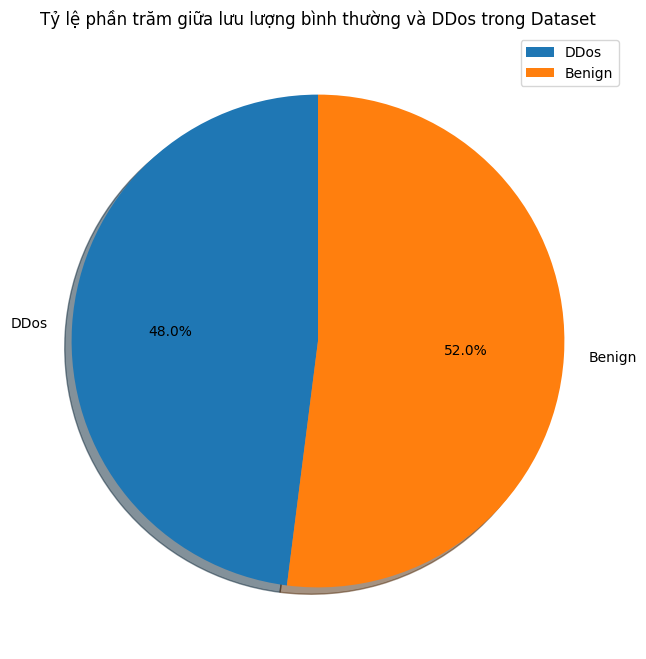

In [ ]:
print(df.label.value_counts())
labels = ["DDos",'Benign']
sizes = [dict(df.label.value_counts())[0], dict(df.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["DDos", "Benign"])
plt.title('Tỷ lệ phần trăm giữa lưu lượng bình thường và DDos trong Dataset')
plt.show()

In [ ]:
# Count missing value for each feature
print(df.isna().sum())

timestamp                   0
datapath_id                 0
flow_id                     0
ip_src                      0
tp_src                      0
ip_dst                      0
tp_dst                      0
ip_proto                    0
icmp_code                   0
icmp_type                   0
flow_duration_sec           0
flow_duration_nsec          0
idle_timeout                0
hard_timeout                0
flags                       0
packet_count                0
byte_count                  0
packet_count_per_second     0
packet_count_per_nsecond    0
byte_count_per_second       0
byte_count_per_nsecond      0
avg_packet_size             0
flow_duration_total         0
idle_mean                   0
idle_std                    0
idle_max                    0
idle_min                    0
label                       0
dtype: int64


In [ ]:
# Extract features for training
df_4_features = df[['packet_count', 'flow_duration_sec', 'byte_count', 'packet_count_per_second', 'label']]
df_10_features = df[['packet_count', 'flow_duration_sec', 'byte_count', 'packet_count_per_second', 'byte_count_per_second', 'avg_packet_size', 'idle_mean', 'idle_std', 'idle_max', 'idle_min', 'label']]
df_15_features = df[['ip_src', 'ip_dst', 'flow_duration_nsec', 'flags', 'packet_count', 'flow_duration_sec', 'byte_count', 'packet_count_per_second', 'byte_count_per_second', 'avg_packet_size', 'flow_duration_total', 'idle_mean', 'idle_std', 'idle_max', 'idle_min', 'label']]
df_all_features = df

In [ ]:
df_15_features.loc[:, 'ip_src'] = df_15_features['ip_src'].str.replace('.', '')
df_15_features.loc[:, 'ip_dst'] = df_15_features['ip_dst'].str.replace('.', '')

df_all_features.loc[:, 'ip_src'] = df_all_features['ip_src'].str.replace('.', '')
df_all_features.loc[:, 'ip_dst'] = df_all_features['ip_dst'].str.replace('.', '')
df_all_features.loc[:, 'flow_id'] = df_all_features['flow_id'].str.replace('.', '')

## Data splitting into train and test

# ----------------------------Training the model--------------------------------

### Model Evaluation

In [ ]:
# Function to evaluate model
def evaluate_model(y_test, y_pred, start_time, end_time):
    acc = accuracy_score(y_test, y_pred)
    print("Success accuracy = {0:.2f} %".format(acc*100))
    fail = 1.0 - acc
    print("Fail accuracy = {0:.2f} %".format(fail*100))
    training_time = end_time - start_time
    #hours, rem = divmod(training_time.seconds, 3600)
    #minutes, seconds = divmod(rem, 60)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Precision:", precision*100)
    print("Recall:", recall*100)
    print("F1-score:", f1*100)
    print(f"Training time: {training_time}")
    return acc, fail, precision, recall, f1, training_time

# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

### Traning model

In [ ]:
def train_and_evaluate(df, feature_set_name):
    X = df.drop('label', axis=1).values.astype(float)
    y = df['label'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    print(f"The train dataset size for {feature_set_name} = ", X_train.shape)
    print(f"The test dataset size for {feature_set_name} = ", X_test.shape)

    models = {
        'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
        'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42),
        'Neural Network': MLPClassifier(hidden_layer_sizes=(5,), max_iter=20, random_state=42, solver='sgd'),
        'SVM': SVC(max_iter=1000, probability=True),
        'GaussianNB': GaussianNB()
    }

    results = []

    for model_name, model in models.items():
        print(f"Evaluate {model_name} Model on {feature_set_name}")
        start_time = datetime.now()
        try:
            model.fit(X_train, y_train)
        except Exception as e:
            print(f"Error while fitting {model_name}: {e}")
            continue
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
        end_time = datetime.now()
        acc, fail, precision, recall, f1, training_time = evaluate_model(y_test, y_pred, start_time, end_time)

        # Calculate ROC and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        print(f"AUC:", roc_auc*100)

        results.append({
            'Model': model_name,
            'Success Accuracy': acc * 100,
            'Fail Accuracy': fail * 100,
            'Precision': precision * 100,
            'Recall': recall * 100,
            'F1 Score': f1 * 100,
            'Training Time': training_time.total_seconds(),
            'AUC': roc_auc
        })
        plot_confusion_matrix(y_test, y_pred, ['Benign', 'DDoS'], f'{model_name} Confusion Matrix ({feature_set_name})')
        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic ({feature_set_name})')
        plt.legend(loc='lower right')
        plt.show()

    results_df = pd.DataFrame(results)
    print(results_df)
    return results_df

## Model Comparison

The train dataset size for 4 Features =  (415482, 4)
The test dataset size for 4 Features =  (138495, 4)
Evaluate KNN Model on 4 Features
Success accuracy = 86.36 %
Fail accuracy = 13.64 %
Precision: 87.48653640716442
Recall: 86.35763023935881
F1-score: 86.20135603503454
Training time: 0:01:29.440848
AUC: 88.16376890478938


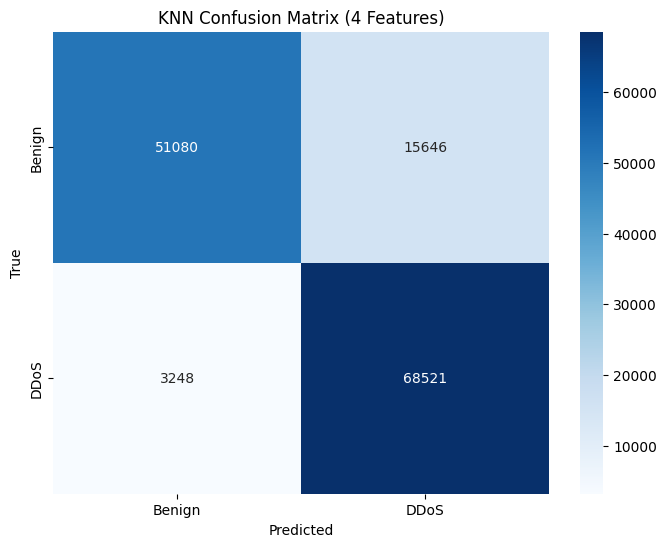

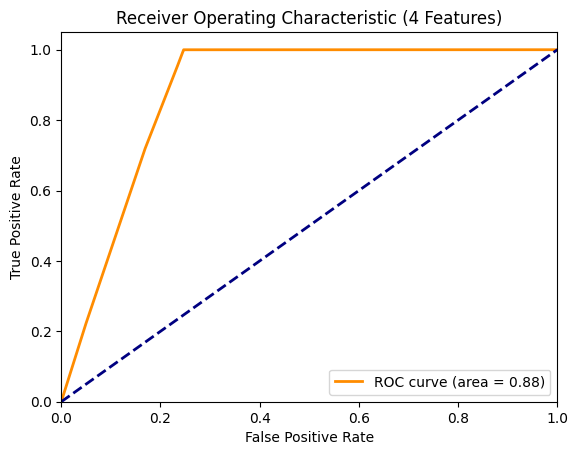

Evaluate Logistic Regression Model on 4 Features
Success accuracy = 49.73 %
Fail accuracy = 50.27 %
Precision: 61.23741241814903
Recall: 49.727426982923575
F1-score: 36.101262258667916
Training time: 0:00:03.698418
AUC: 78.69049652651927


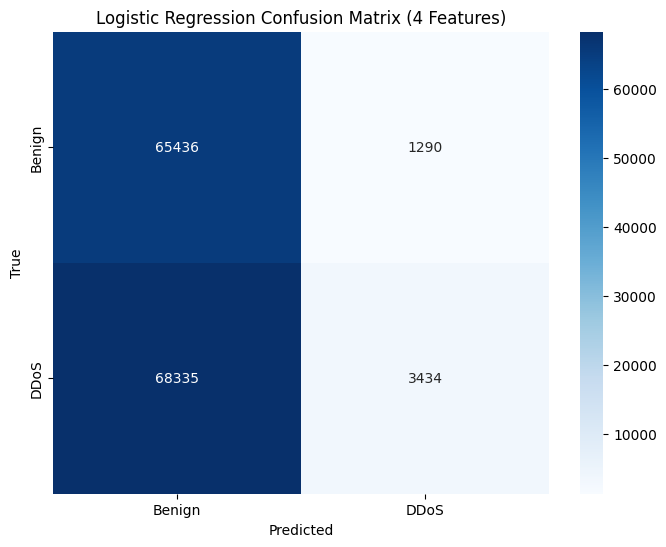

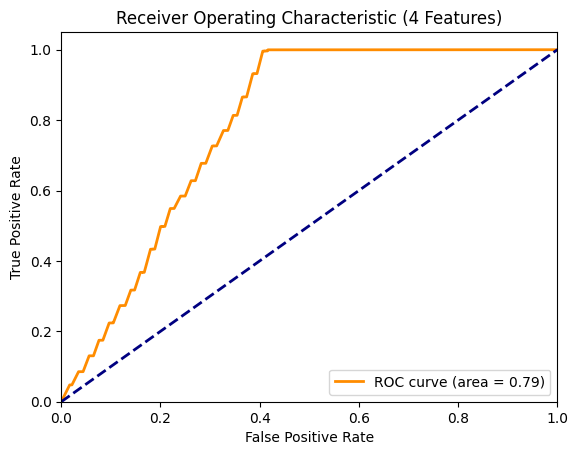

Evaluate Neural Network Model on 4 Features
Success accuracy = 87.81 %
Fail accuracy = 12.19 %
Precision: 89.87143919709327
Recall: 87.80822412361458
F1-score: 87.5891852034265
Training time: 0:00:07.495600
AUC: 87.94204037685813


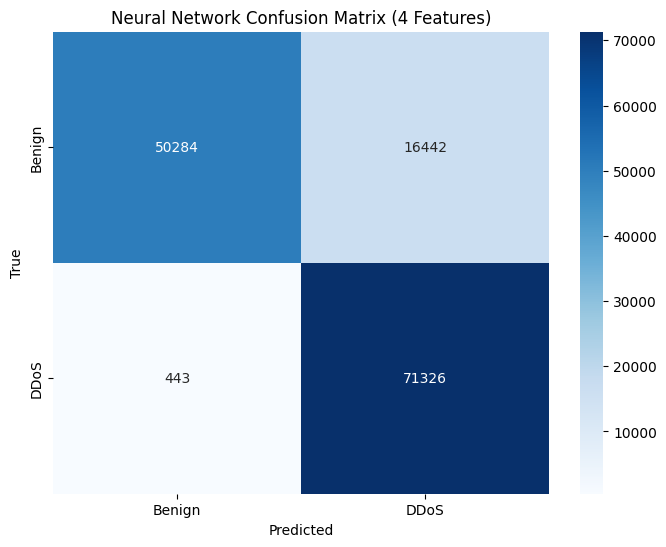

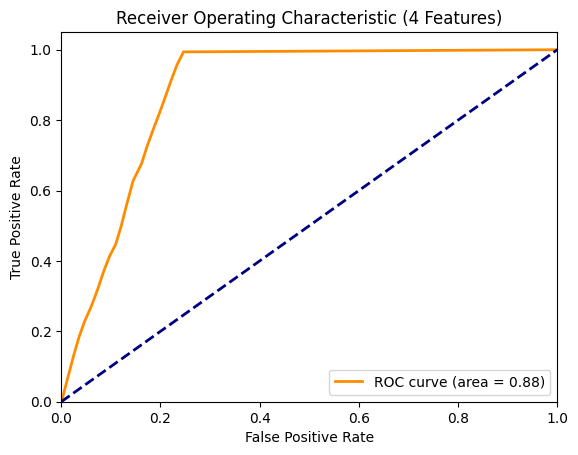

Evaluate SVM Model on 4 Features


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Success accuracy = 52.19 %
Fail accuracy = 47.81 %
Precision: 74.94829757568509
Recall: 52.19321997184014
F1-score: 36.204650296331394
Training time: 0:06:44.651941
AUC: 87.34075583820146


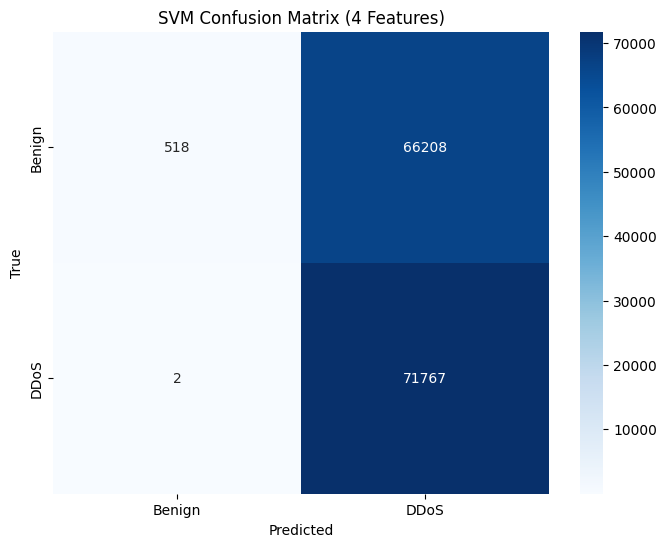

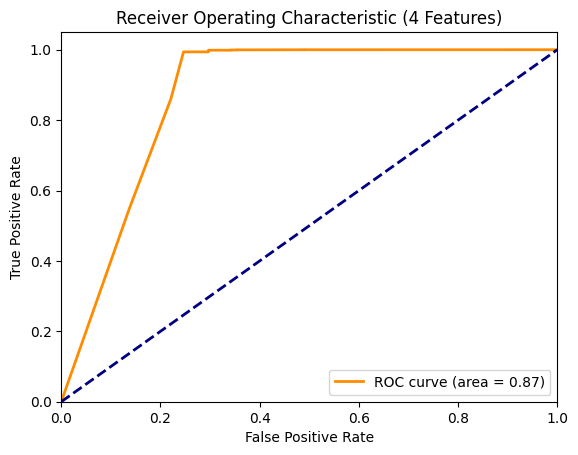

Evaluate GaussianNB Model on 4 Features
Success accuracy = 58.35 %
Fail accuracy = 41.65 %
Precision: 76.89803604314793
Recall: 58.34867684753963
F1-score: 48.464891062464886
Training time: 0:00:00.197316
AUC: 86.79970940480703


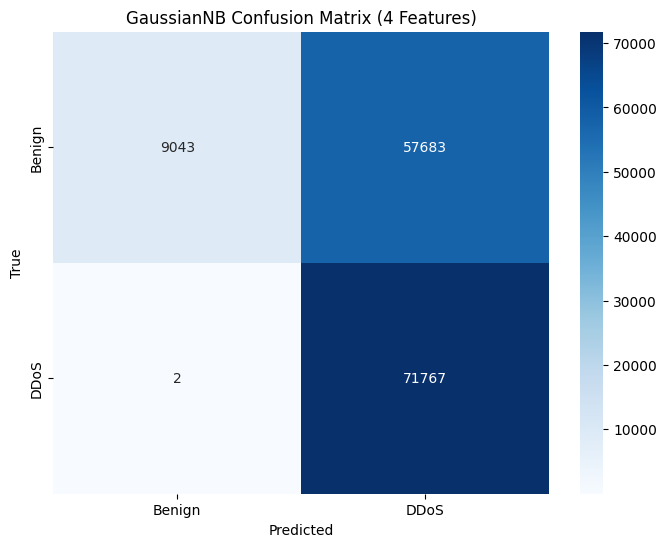

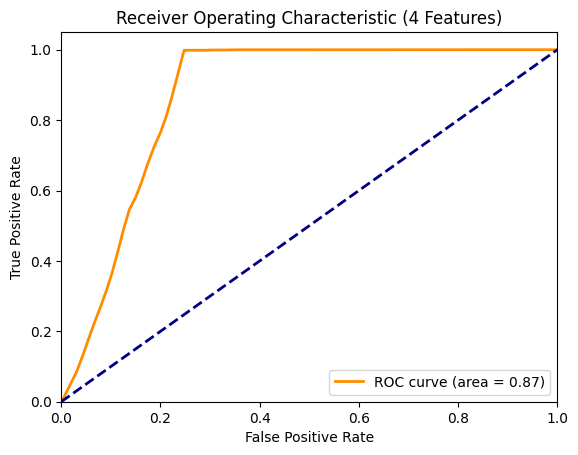

                 Model  Success Accuracy  Fail Accuracy  Precision     Recall  \
0                  KNN         86.357630      13.642370  87.486536  86.357630   
1  Logistic Regression         49.727427      50.272573  61.237412  49.727427   
2       Neural Network         87.808224      12.191776  89.871439  87.808224   
3                  SVM         52.193220      47.806780  74.948298  52.193220   
4           GaussianNB         58.348677      41.651323  76.898036  58.348677   

    F1 Score  Training Time       AUC  
0  86.201356      89.440848  0.881638  
1  36.101262       3.698418  0.786905  
2  87.589185       7.495600  0.879420  
3  36.204650     404.651941  0.873408  
4  48.464891       0.197316  0.867997  
The train dataset size for 10 Features =  (415482, 10)
The test dataset size for 10 Features =  (138495, 10)
Evaluate KNN Model on 10 Features
Success accuracy = 96.23 %
Fail accuracy = 3.77 %
Precision: 96.47725144590041
Recall: 96.22585652911657
F1-score: 96.215382727948

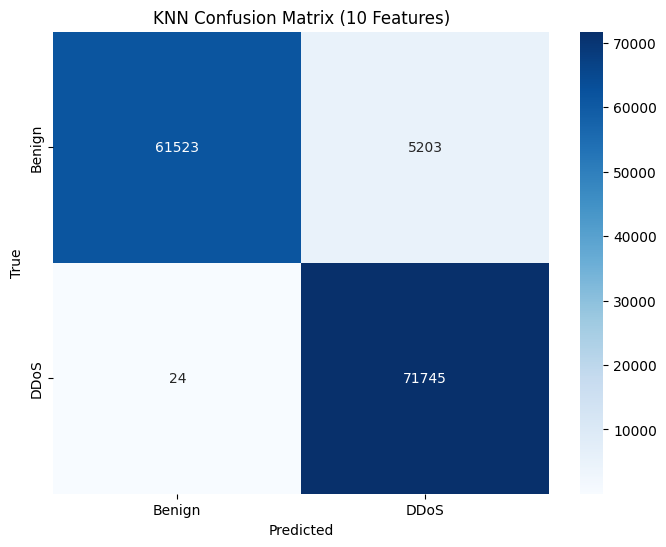

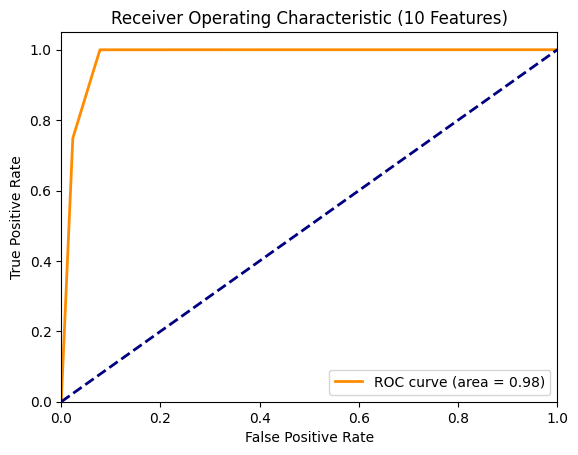

Evaluate Logistic Regression Model on 10 Features
Success accuracy = 78.62 %
Fail accuracy = 21.38 %
Precision: 79.64605820011246
Recall: 78.61800064984295
F1-score: 78.52275735141104
Training time: 0:00:08.237765
AUC: 90.89745560969818


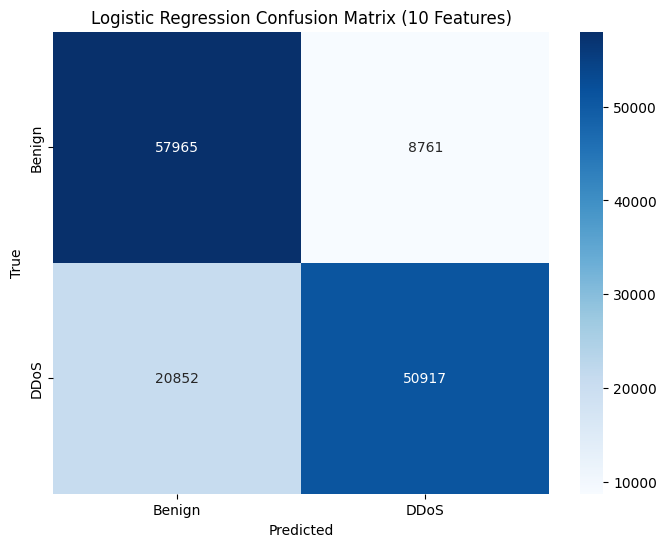

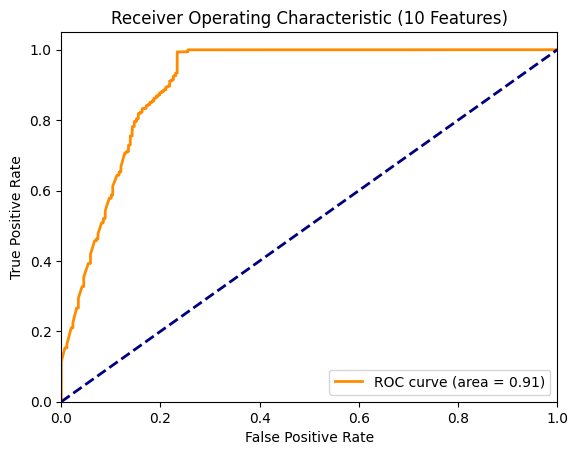

Evaluate Neural Network Model on 10 Features
Success accuracy = 89.29 %
Fail accuracy = 10.71 %
Precision: 90.29129132496524
Recall: 89.29203220332865
F1-score: 89.18946372487788
Training time: 0:00:07.498192
AUC: 92.43541424155575


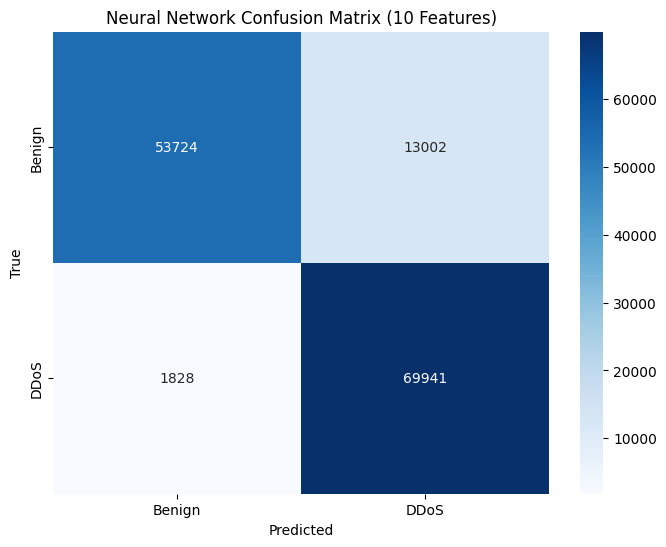

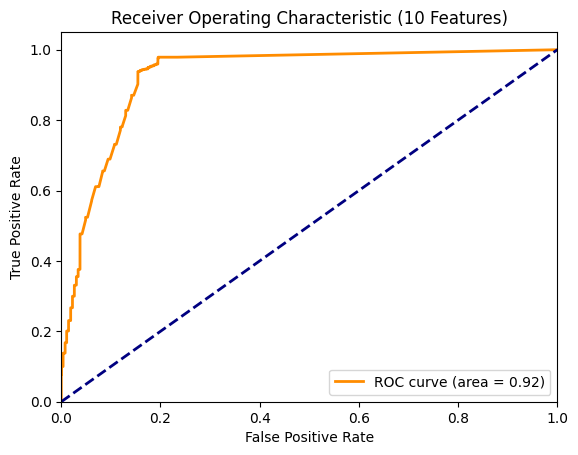

Evaluate SVM Model on 10 Features


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Success accuracy = 52.18 %
Fail accuracy = 47.82 %
Precision: 74.93639730769883
Recall: 52.17805696956569
F1-score: 36.17123105353419
Training time: 0:10:07.746552
AUC: 89.4374754284596


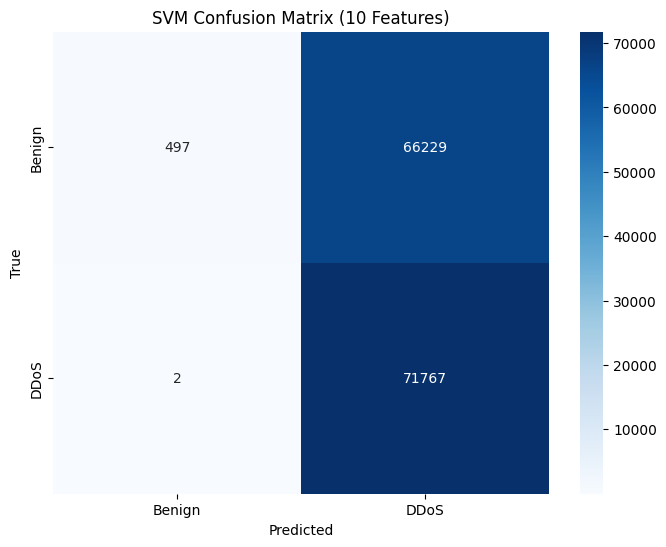

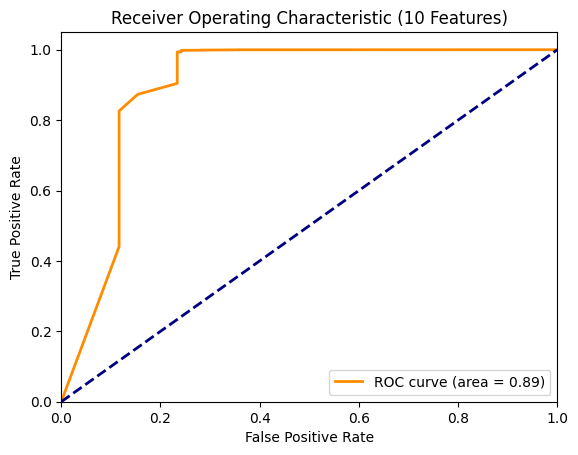

Evaluate GaussianNB Model on 10 Features
Success accuracy = 58.55 %
Fail accuracy = 41.45 %
Precision: 76.95371694868926
Recall: 58.54507382938012
F1-score: 48.81926851068038
Training time: 0:00:00.239352
AUC: 87.9205757617684


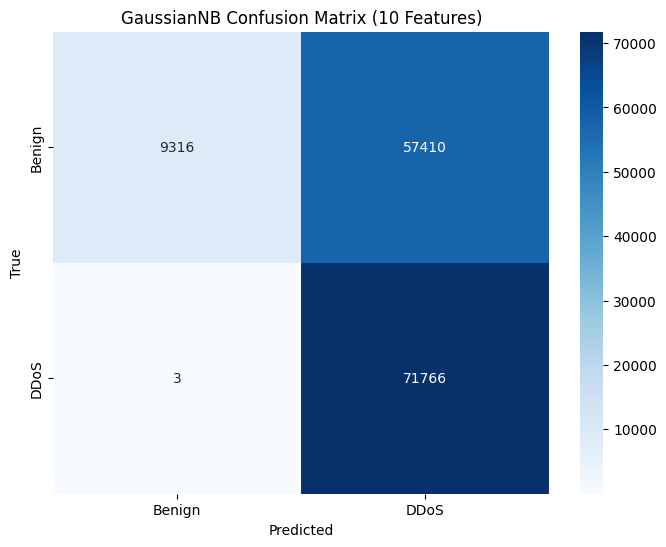

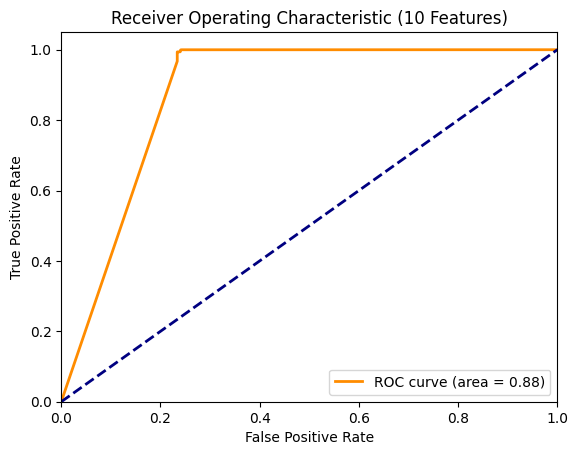

                 Model  Success Accuracy  Fail Accuracy  Precision     Recall  \
0                  KNN         96.225857       3.774143  96.477251  96.225857   
1  Logistic Regression         78.618001      21.381999  79.646058  78.618001   
2       Neural Network         89.292032      10.707968  90.291291  89.292032   
3                  SVM         52.178057      47.821943  74.936397  52.178057   
4           GaussianNB         58.545074      41.454926  76.953717  58.545074   

    F1 Score  Training Time       AUC  
0  96.215383      78.810439  0.978505  
1  78.522757       8.237765  0.908975  
2  89.189464       7.498192  0.924354  
3  36.171231     607.746552  0.894375  
4  48.819269       0.239352  0.879206  
The train dataset size for 15 Features =  (415482, 15)
The test dataset size for 15 Features =  (138495, 15)
Evaluate KNN Model on 15 Features
Success accuracy = 98.46 %
Fail accuracy = 1.54 %
Precision: 98.45841543574582
Recall: 98.45842810209756
F1-score: 98.458403876313

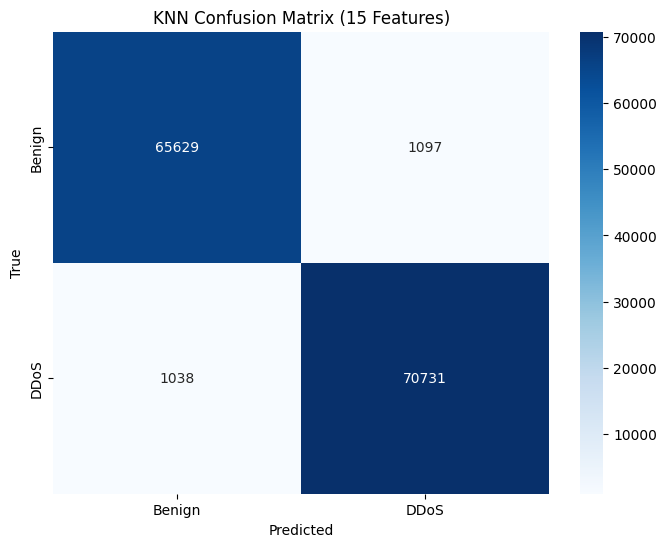

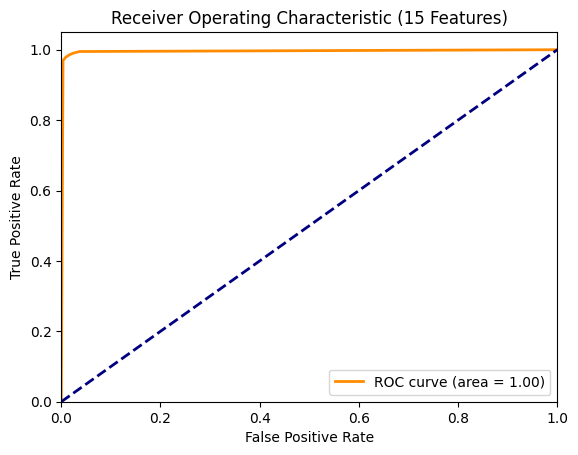

Evaluate Logistic Regression Model on 15 Features
Success accuracy = 90.51 %
Fail accuracy = 9.49 %
Precision: 90.51278107965618
Recall: 90.51157081483086
F1-score: 90.50933637511474
Training time: 0:00:02.263512
AUC: 96.11770102420992


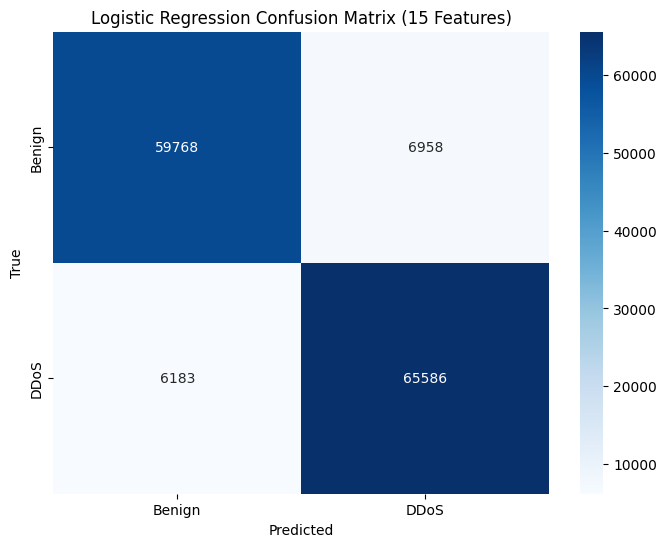

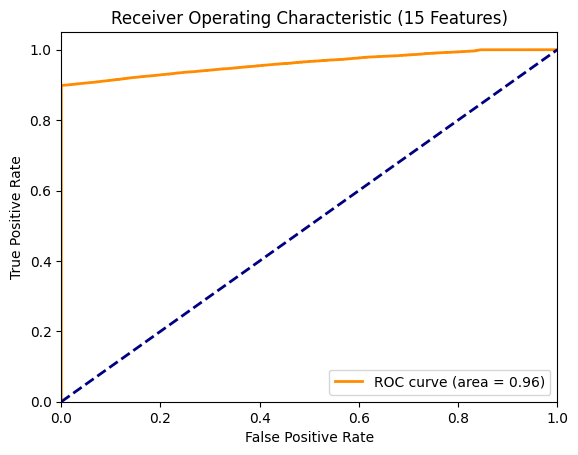

Evaluate Neural Network Model on 15 Features
Success accuracy = 51.82 %
Fail accuracy = 48.18 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 26.85379076640471
Recall: 51.820643344525074
F1-score: 35.375677740300006
Training time: 0:00:08.446281
AUC: 50.0


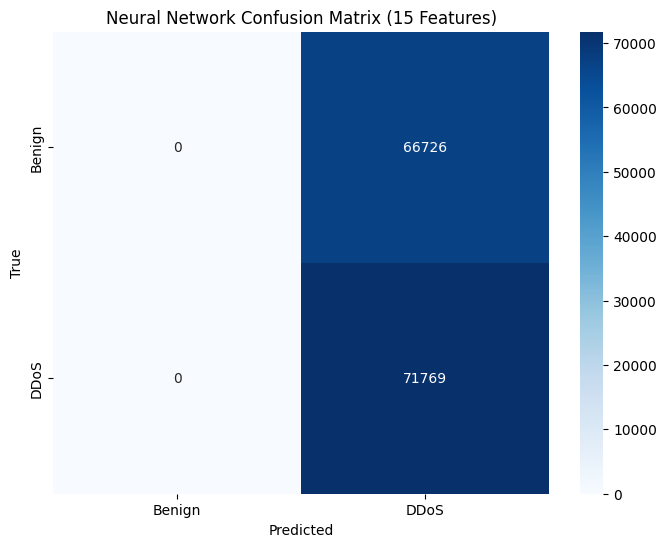

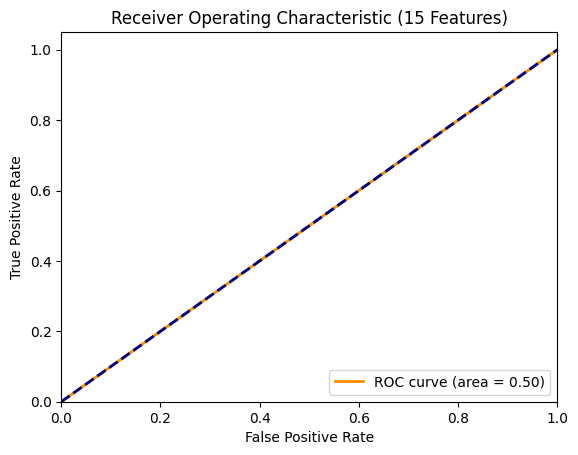

Evaluate SVM Model on 15 Features


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Success accuracy = 40.26 %
Fail accuracy = 59.74 %
Precision: 23.589223947017075
Recall: 40.2570489909383
F1-score: 29.747469989865078
Training time: 0:10:37.055760
AUC: 8.26735143731526


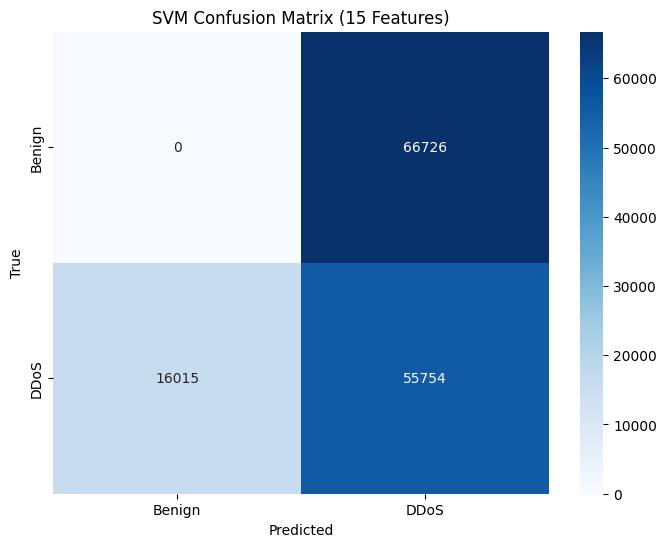

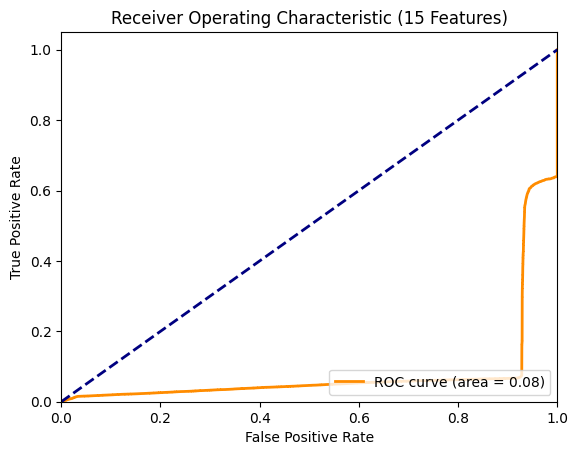

Evaluate GaussianNB Model on 15 Features
Success accuracy = 94.16 %
Fail accuracy = 5.84 %
Precision: 94.37706356358787
Recall: 94.15935593342721
F1-score: 94.14397058462427
Training time: 0:00:00.315957
AUC: 99.41920740200545


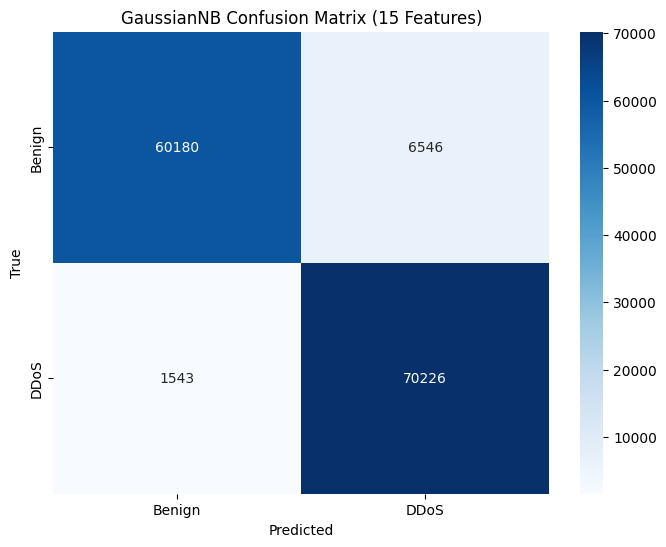

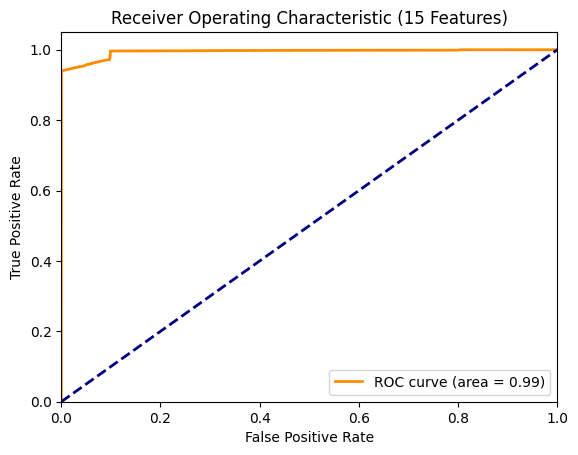

                 Model  Success Accuracy  Fail Accuracy  Precision     Recall  \
0                  KNN         98.458428       1.541572  98.458415  98.458428   
1  Logistic Regression         90.511571       9.488429  90.512781  90.511571   
2       Neural Network         51.820643      48.179357  26.853791  51.820643   
3                  SVM         40.257049      59.742951  23.589224  40.257049   
4           GaussianNB         94.159356       5.840644  94.377064  94.159356   

    F1 Score  Training Time       AUC  
0  98.458404      39.674723  0.995266  
1  90.509336       2.263512  0.961177  
2  35.375678       8.446281  0.500000  
3  29.747470     637.055760  0.082674  
4  94.143971       0.315957  0.994192  
The train dataset size for All Features =  (415482, 24)
The test dataset size for All Features =  (138495, 24)
Evaluate KNN Model on All Features
Success accuracy = 98.59 %
Fail accuracy = 1.41 %
Precision: 98.58765601018504
Recall: 98.58623054983934
F1-score: 98.586348545

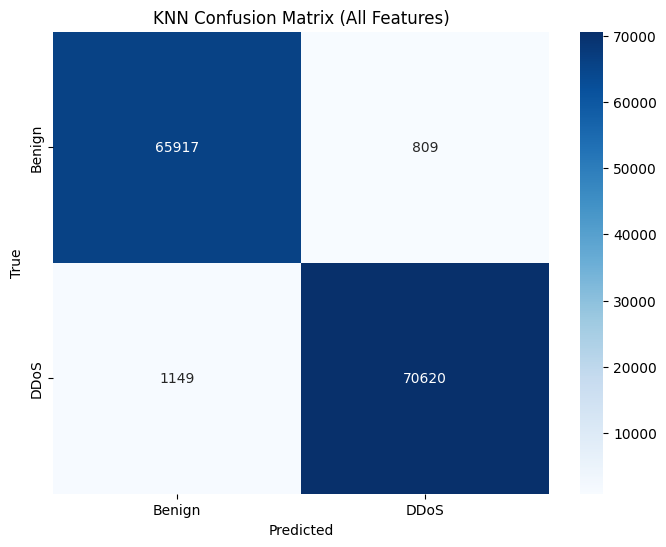

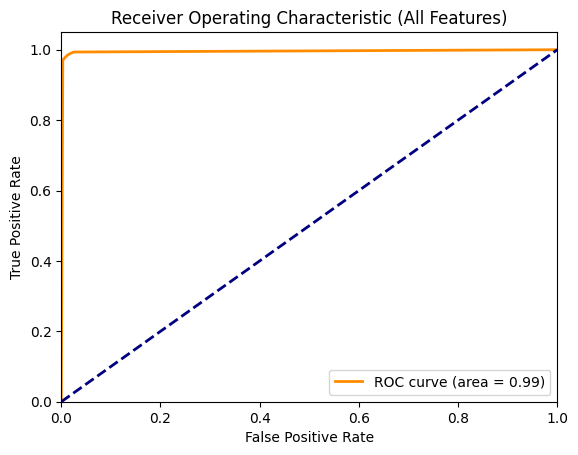

Evaluate Logistic Regression Model on All Features
Success accuracy = 91.62 %
Fail accuracy = 8.38 %
Precision: 91.62233230413261
Recall: 91.61630383768366
F1-score: 91.61749867200129
Training time: 0:00:03.724573
AUC: 96.17829973734446


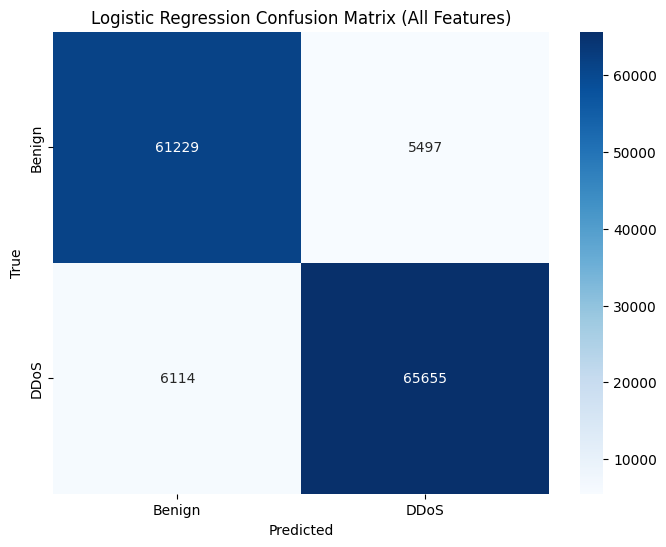

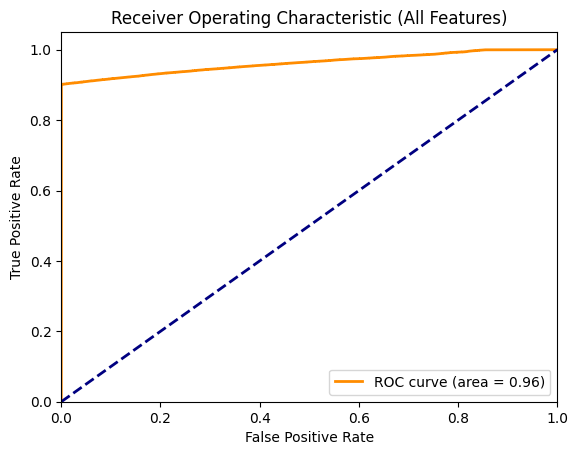

Evaluate Neural Network Model on All Features
Success accuracy = 51.82 %
Fail accuracy = 48.18 %
Precision: 26.85379076640471
Recall: 51.820643344525074
F1-score: 35.375677740300006
Training time: 0:00:08.796442


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC: 50.0


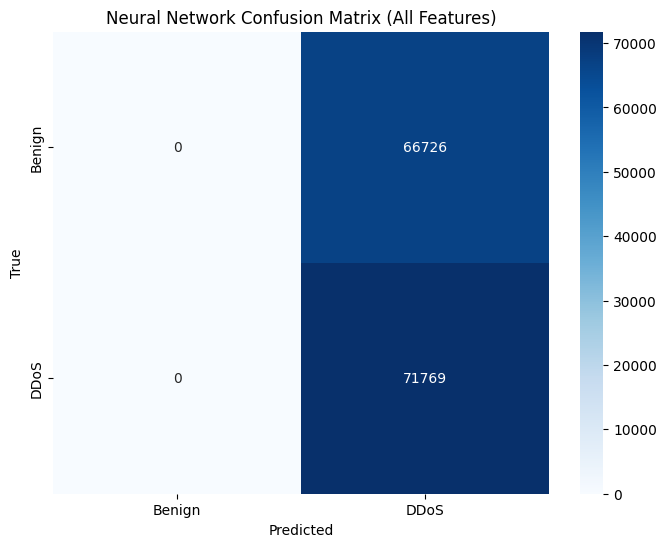

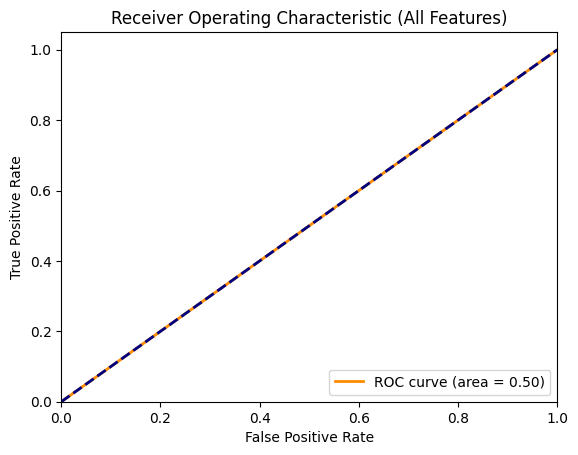

Evaluate SVM Model on All Features


KeyboardInterrupt: 

In [ ]:
results_4_features = train_and_evaluate(df_4_features, "4 Features")
results_10_features = train_and_evaluate(df_10_features, "10 Features")
results_15_features = train_and_evaluate(df_15_features, "15 Features")
results_all_features = train_and_evaluate(df_all_features, "All Features")

In [ ]:
# Combine results
all_results = {
    "4 Features": results_4_features,
    "10 Features": results_10_features,
    "15 Features": results_15_features,
    "All Features": results_all_features
}

for feature_set_name, results_df in all_results.items():
    print(f"\nResults for {feature_set_name}:")
    print(results_df)


Results for 4 Features:
                 Model  Success Accuracy  Fail Accuracy  Precision     Recall  \
0                  KNN         86.403119      13.596881  87.391056  86.403119   
1  Logistic Regression         49.631395      50.368605  61.482125  49.631395   
2       Neural Network         87.860934      12.139066  89.891124  87.860934   
3                  SVM         52.378064      47.621936  75.052787  52.378064   
4           GaussianNB         58.327015      41.672985  76.856152  58.327015   

    F1 Score  Training Time       AUC  
0  86.258277     108.584626  0.879360  
1  36.080926       4.327611  0.786598  
2  87.640187       9.243354  0.879664  
3  36.422528     424.777002  0.875797  
4  48.308360       0.208830  0.868383  

Results for 10 Features:
                 Model  Success Accuracy  Fail Accuracy  Precision     Recall  \
0                  KNN         94.913896       5.086104  94.948414  94.913896   
1  Logistic Regression         88.442182      11.557818  90.

### CHOOSE KNN MODEL WITH 15 features

In [ ]:
def train_and_evaluate_for_KNN_15features(df, feature_set_name):
    X = df.drop('label', axis=1).values.astype(float)
    y = df['label'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    print(f"The train dataset size for {feature_set_name} = ", X_train.shape)
    print(f"The test dataset size for {feature_set_name} = ", X_test.shape)

    models = {
        'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    }

    results = []

    for model_name, model in models.items():
        print(f"Evaluate {model_name} Model on {feature_set_name}")
        start_time = datetime.now()
        try:
            model.fit(X_train, y_train)
        except Exception as e:
            print(f"Error while fitting {model_name}: {e}")
            continue
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class
        end_time = datetime.now()
        acc, fail, precision, recall, f1, training_time = evaluate_model(y_test, y_pred, start_time, end_time)

        # Calculate ROC and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        print(f"AUC:", roc_auc*100)

        results.append({
            'Model': model_name,
            'Success Accuracy': acc * 100,
            'Fail Accuracy': fail * 100,
            'Precision': precision * 100,
            'Recall': recall * 100,
            'F1 Score': f1 * 100,
            'Training Time': training_time.total_seconds(),
            'AUC': roc_auc
        })
        plot_confusion_matrix(y_test, y_pred, ['Benign', 'DDoS'], f'{model_name} Confusion Matrix ({feature_set_name})')
        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic ({feature_set_name})')
        plt.legend(loc='lower right')
        plt.show()

    results_df = pd.DataFrame(results)
    print(results_df)
    return results_df

The train dataset size for 15 Features =  (415482, 15)
The test dataset size for 15 Features =  (138495, 15)
Evaluate KNN Model on 15 Features
Success accuracy = 98.43 %
Fail accuracy = 1.57 %
Precision: 98.43313796778048
Recall: 98.43315643164013
F1-score: 98.43312990834985
Training time: 0:00:42.488343
AUC: 99.49968846042142


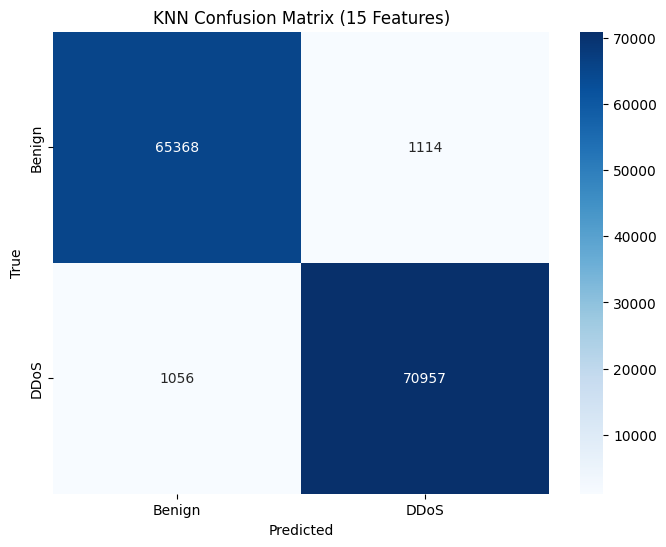

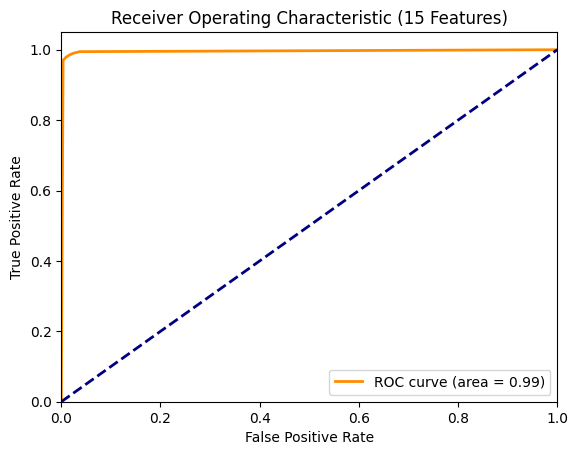

  Model  Success Accuracy  Fail Accuracy  Precision     Recall  F1 Score  \
0   KNN         98.433156       1.566844  98.433138  98.433156  98.43313   

   Training Time       AUC  
0      42.488343  0.994997  


In [ ]:
results_15_features_final = train_and_evaluate_for_KNN_15features(df_15_features, "15 Features")